In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Dartoon/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
h=0.7
data=numpy.loadtxt('../AGN_host_inference.txt')
#print data
log_lum_bol_obs=data[:,0]
log_bh_mass_obs=data[:,1]+numpy.log10(h)
log_stellar_mass_obs=data[:,2]+numpy.log10(h)
M_r_obs=data[:,3]

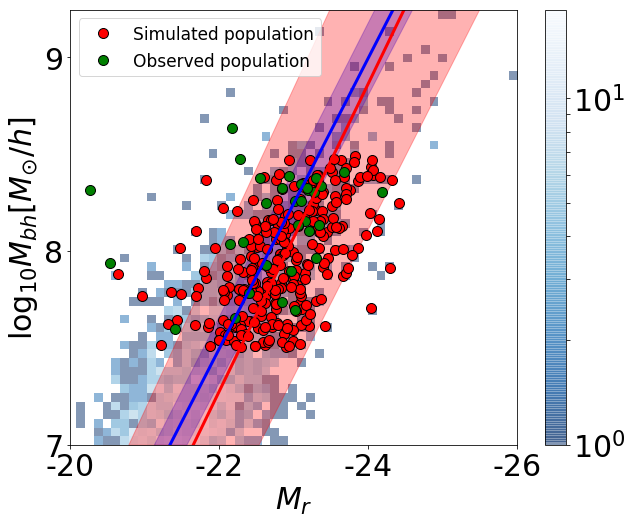

In [7]:
def lfit(x,m,c):
    return m*x+c

import scipy.optimize

f,ax=plt.subplots(1,1,figsize=(10,8))

obj=ax
redshift=1.5

r_band_magnitudes_overall=numpy.load('r_band_magnitude_overall_population.npy')
r_band_magnitudes_selected=numpy.load('r_band_magnitude_selected_population.npy')

log10_bhmass_overall=numpy.load('log10_bhmass_overall_population.npy')
log10_bhmass_selected=numpy.load('log10_bhmass_selected_population.npy')



#plt.scatter(numpy.log10(bhmass[mask]),numpy.log10(stellar_mass))
panel2=obj.hist2d(-r_band_magnitudes_overall,log10_bhmass_overall,norm=mpl.colors.LogNorm(),cmap='Blues_r',bins=50,zorder=0,alpha=0.5)

fit=scipy.optimize.curve_fit(lfit,log10_bhmass_overall,-r_band_magnitudes_overall)
fit_err=numpy.sqrt(numpy.diag(fit[1]))
lmbh_space=numpy.linspace(7,9.5,100)
r_band_space=lfit(lmbh_space,fit[0][0],fit[0][1])
plt.plot(r_band_space,lmbh_space,color='blue',linewidth=3)

r_band_space_ub=lfit(lmbh_space,fit[0][0]+fit_err[0]/2,fit[0][1]+fit_err[1]/2)
r_band_space_lb=lfit(lmbh_space,fit[0][0]-fit_err[0]/2,fit[0][1]-fit_err[1]/2)
plt.fill_betweenx(lmbh_space,r_band_space_lb,r_band_space_ub,color='blue',alpha=0.3)




cbar=f.colorbar(panel2[3],ax=obj)
cbar.ax.tick_params(labelsize=30) 
obj.errorbar(-r_band_magnitudes_selected,log10_bhmass_selected,zorder=1,
             color='red',label='Simulated population',linestyle=' ',marker='o',ms=10,mec='k')
obj.errorbar(-M_r_obs,log_bh_mass_obs,zorder=1,color='green',label='Observed population',
             linestyle=' ',marker='o',ms=10,mec='k')


fit=scipy.optimize.curve_fit(lfit,log10_bhmass_selected,-r_band_magnitudes_selected)
fit_err=numpy.sqrt(numpy.diag(fit[1]))
lmbh_space=numpy.linspace(7,9.5,100)
r_band_space=lfit(lmbh_space,fit[0][0],fit[0][1])
plt.plot(r_band_space,lmbh_space,color='red',linewidth=3)

r_band_space_ub=lfit(lmbh_space,fit[0][0]+fit_err[0]/2,fit[0][1]+fit_err[1]/2)
r_band_space_lb=lfit(lmbh_space,fit[0][0]-fit_err[0]/2,fit[0][1]-fit_err[1]/2)
plt.fill_betweenx(lmbh_space,r_band_space_lb,r_band_space_ub,color='red',alpha=0.3)







obj.set_yticks([7.0,8.0,9.0])
obj.set_xticks([18,20,22,24,26])
obj.set_xticklabels(['-18','-20','-22','-24','-26'])






#obj.set_ylim([10,12])
obj.tick_params(labelsize=30)

obj.set_xlim(20,26)

obj.set_ylabel('$\log_{10}M_{bh}[M_{\odot}/h]$',fontsize=30)
obj.set_xlabel('$M_r$',fontsize=30)
obj.legend(loc='upper left',fontsize=17,numpoints=1)

plt.savefig('BHII_ML.eps',bbox_inches='tight')


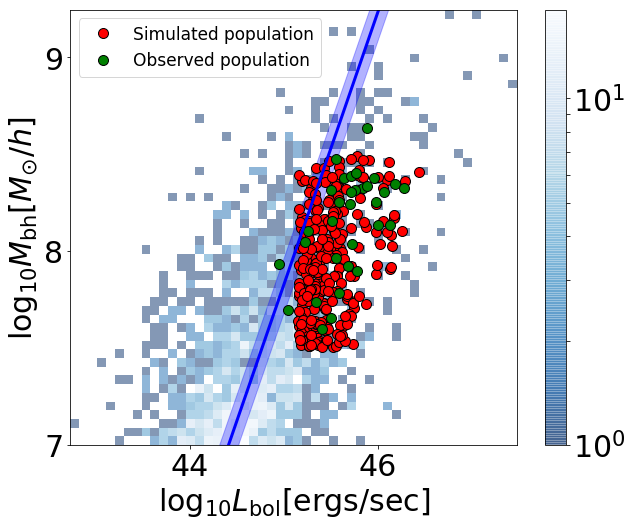

In [9]:

f,ax=plt.subplots(1,1,figsize=(10,8))

obj=ax
redshift=1.5

log10_L_bol_blackhole_overall=numpy.load('./log10_L_bol_blackhole_overall_population.npy')
log10_L_bol_blackhole_selected=numpy.load('./log10_L_bol_blackhole_selected_population.npy')

panel2=obj.hist2d(log10_L_bol_blackhole_overall,log10_bhmass_overall,norm=mpl.colors.LogNorm(),cmap='Blues_r',bins=50,zorder=0,alpha=0.5)

fit=scipy.optimize.curve_fit(lfit,log10_bhmass_overall,log10_L_bol_blackhole_overall)
fit_err=numpy.sqrt(numpy.diag(fit[1]))
lmbh_space=numpy.linspace(7,9.5,100)
r_band_space=lfit(lmbh_space,fit[0][0],fit[0][1])
plt.plot(r_band_space,lmbh_space,color='blue',linewidth=3)

r_band_space_ub=lfit(lmbh_space,fit[0][0],fit[0][1]+fit_err[1]/2)
r_band_space_lb=lfit(lmbh_space,fit[0][0],fit[0][1]-fit_err[1]/2)
plt.fill_betweenx(lmbh_space,r_band_space_lb,r_band_space_ub,color='blue',alpha=0.3)


cbar=f.colorbar(panel2[3],ax=obj)
cbar.ax.tick_params(labelsize=30) 

obj.errorbar(log10_L_bol_blackhole_selected,log10_bhmass_selected,zorder=1,
             color='red',label='Simulated population',linestyle=' ',marker='o',ms=10,mec='k')
obj.errorbar(log_lum_bol_obs,log_bh_mass_obs,zorder=1,color='green',
             label='Observed population',linestyle=' ',marker='o',ms=10,mec='k')


fit=scipy.optimize.curve_fit(lfit,log10_bhmass_selected,log10_L_bol_blackhole_selected)

fit_err=numpy.sqrt(numpy.diag(fit[1]))

lmbh_space=numpy.linspace(7,9.5,100)
r_band_space=lfit(lmbh_space,fit[0][0],fit[0][1])


#plt.plot(r_band_space,lmbh_space,color='red',linewidth=3)


r_band_space_ub=lfit(lmbh_space,fit[0][0],fit[0][1]+fit_err[1]/2)
r_band_space_lb=lfit(lmbh_space,fit[0][0],fit[0][1]-fit_err[1]/2)
#plt.fill_betweenx(lmbh_space,r_band_space_lb,r_band_space_ub,color='red',alpha=0.3)



obj.set_yticks([7.0,8.0,9.0])
#obj.set_xlim([10.,12])
obj.tick_params(labelsize=30)

obj.set_xlabel('$\log_{10}L_{\mathrm{bol}}[\mathrm{ergs/sec}]$',fontsize=30)
obj.set_ylabel('$\log_{10}{M_{\mathrm{bh}}}[M_{\odot}/h]$',fontsize=30)
obj.legend(loc='upper left',fontsize=17,numpoints=1)

plt.savefig('BHII_Select_function.pdf',bbox_inches='tight')
